In [209]:
import numpy as np

In [210]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


In [211]:
dist1=np.random.multivariate_normal(mean_01,cov_01,500)
dist2=np.random.multivariate_normal(mean_02,cov_02,500)

In [212]:
dist1.shape

(500, 2)

In [213]:
dist2.shape

(500, 2)

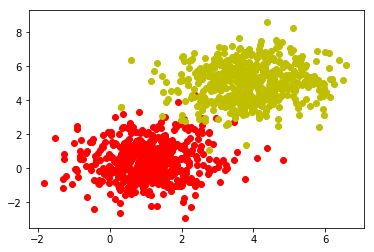

In [214]:
import matplotlib.pyplot as plt
plt.scatter(dist1[:,0],dist1[:,1],color='r')
plt.scatter(dist2[:,0],dist2[:,1],color='y')
plt.show()

In [215]:
#create dataset and split into test and train
data=np.zeros((1000,4))

data[:500,:2]=dist1 ###class 0
data[500:,:2]=dist2  ###class 1
data[500:,-1]=1


In [216]:
np.random.shuffle(data)

In [217]:
split=0.8

In [218]:
val=int(split*len(data))
x_train=data[:val,:]
x_test=data[val:,:]
y_train=data[:val,-1].reshape(-1,1)
y_test=data[val:,-1].reshape(-1,1)


In [237]:
def gradient_error(x_train,y_train,weights,bias):
    y_pred=np.dot(x_train,weights)+bias
    y_pred=1/(1+np.exp(-y_pred))
    error=-(np.sum(y_train*np.log2(y_pred)+(1-y_train)*np.log2(1-y_pred)))/x_train.shape[0]
    
    grad_w=((np.sum((y_pred-y_train)*x_train,axis=0))/(x_train.shape[0])).reshape(-1,1)
    grad_b=np.array((np.sum(y_pred-y_train))/(x_train.shape[0])).reshape(-1,1)
    
    return grad_w,grad_b,error

In [245]:
def logistic_regression(x_train,y_train,epochs=1000,learning_rate=0.1):
    weights=np.ones((x_train.shape[1],1))
    final_error=[]
    bias=np.array([0]).reshape(-1,1)
    for i in range(epochs):
        grad_w,grad_b,error=gradient_error(x_train,y_train,weights,bias)
        final_error.append(error)
        weights=weights-learning_rate*grad_w
        bias=bias-learning_rate*grad_b
    return weights,bias,final_error
        
        

In [246]:
weights,bias,final_error=logistic_regression(x_train,y_train)

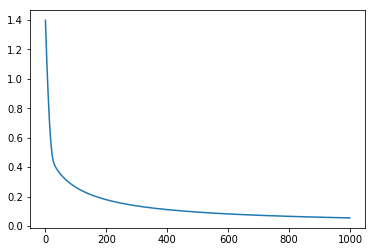

In [247]:
import matplotlib.pyplot as plt
plt.plot(final_error)
plt.show()

In [248]:
bias

array([[-4.31586711]])

In [234]:
weights.shape

(4, 1)

In [244]:
final_error

[1.3987243778289682,
 1.398660522130529,
 1.3985966679300665,
 1.3985328152276646,
 1.398468964023407,
 1.3984051143173764,
 1.398341266109657,
 1.3982774194003325,
 1.3982135741894863,
 1.3981497304772015,
 1.3980858882635627,
 1.3980220475486527,
 1.397958208332555,
 1.3978943706153542,
 1.3978305343971322,
 1.3977666996779738,
 1.3977028664579627,
 1.3976390347371817,
 1.397575204515715,
 1.3975113757936457,
 1.3974475485710585,
 1.3973837228480355,
 1.3973198986246613,
 1.3972560759010184,
 1.3971922546771918,
 1.397128434953264,
 1.3970646167293197,
 1.3970008000054417,
 1.3969369847817144,
 1.3968731710582198,
 1.3968093588350428,
 1.396745548112267,
 1.396681738889975,
 1.3966179311682518,
 1.3965541249471805,
 1.3964903202268442,
 1.396426517007327,
 1.396362715288712,
 1.396298915071084,
 1.3962351163545252,
 1.3961713191391205,
 1.396107523424953,
 1.396043729212106,
 1.395979936500663,
 1.3959161452907085,
 1.3958523555823257,
 1.3957885673755979,
 1.395724780670609,
 1.3956